**NOTEBOOK 2**

### Exercise 02.1
In this exercise it was asked to evaluate via Monte Carlo methods the integral $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ sampling at first from a uniform distribution [0,1] and then using the importance sampling method. In the first case the integral can be estimated via the following relation $$I = \lim_{N\to +\infty} \frac{1}{N} \sum_{i=1}^{N} f(x_{i}) $$ where the values $x_{i}$ are uniformly sampled from the interval [0,1]. It corresponds to the computation of the mean of the integrand function in the aforementioned x-interval. 
For what concerns the importance sampling method, one can rewrite the integral in this form $$ I = \int_0^1 g(x)p(x)dx $$ where $g(x) = \frac {f(x)}{p(x)}$ and $p(x)$ stands for the non-uniform probability distribution function, which should have a functional form similar to that of $f(x)$. From this PDF one can sample values $x_{i}$ using, for instance, the reject technique and then estimate the integral through $$I = \lim_{N\to +\infty} \frac{1}{N} \sum_{i=1}^{N} g(x_{i}) $$
In this exercise, it was chosen $p(x) = \frac{3}{2}(1 - x^2)$ since it has a similar functional profile to the integrand $f(x) =  \frac{\pi}{2}\cos(\pi x/2)$. 
For both requests 1 and 2, the integral was estimated using two different methods: in method 1 M integrals (with $M = 10000$) where evaluated using $N = 100$ points, while in the second method N integrals were evaluated sampling M points. In both cases the blocking method was applied. 
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

**METHOD 1 - Evaluation of M integrals sampling N points**

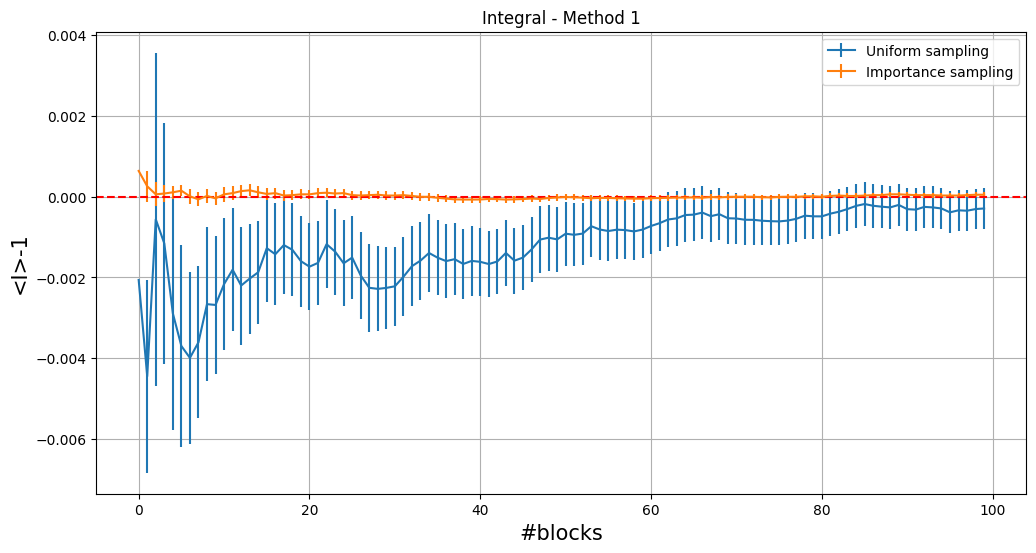

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

media_unif, varianza_unif = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_02/exercise_2_01/results_1.dat", unpack =True, usecols=(0,1))
media_notu, varianza_notu = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_02/exercise_2_01/results_2.dat", unpack =True, usecols=(0,1))

M = 10000 #Number of throws
N = 100 #Number of blocks
L = (int)(M/N) #Number of throws per block
x = np.arange(N) 
I = 1.

plt.figure(figsize=(12,6))
plt.errorbar(x,media_unif-I,yerr=varianza_unif, label = "Uniform sampling" )
plt.errorbar(x,media_notu-I,yerr=varianza_notu, label = "Importance sampling")
plt.axhline(y = 0., color = 'r', linestyle = '--')
plt.xlabel('#blocks', fontsize=15)
plt.ylabel('<I>-1', fontsize=15)
plt.title("Integral - Method 1")
plt.legend()
plt.grid(True)
plt.show()


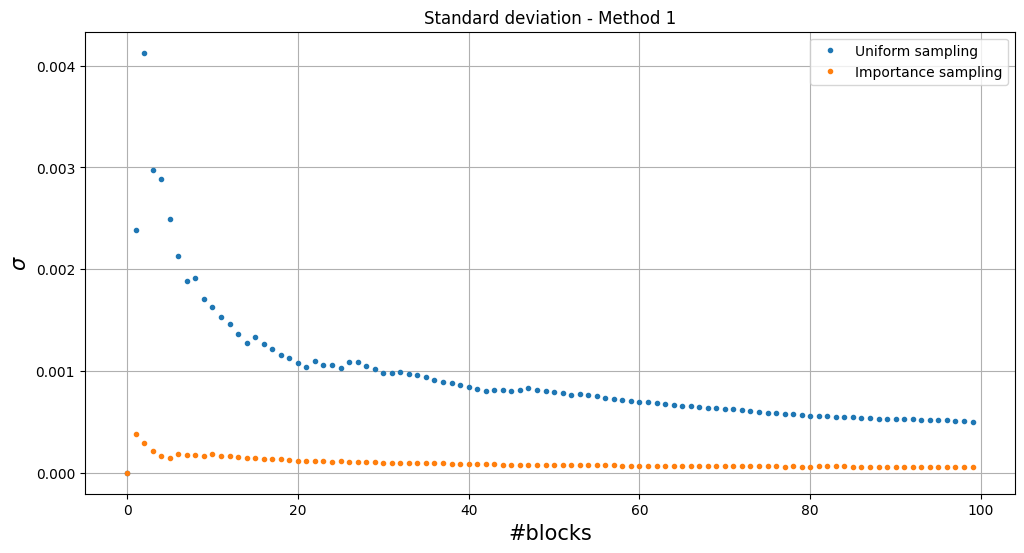

In [2]:
plt.figure(figsize=(12,6))
plt.plot(x,varianza_unif, marker = ".", linestyle = "none", label = "Uniform sampling" )
plt.plot(x,varianza_notu, marker = ".", linestyle = "none", label = "Importance sampling")
plt.xlabel('#blocks', fontsize=15)
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title("Standard deviation - Method 1")
plt.legend()
plt.grid(True)
plt.show()

**METHOD 2 - Evaluation of N integrals sampling M points**

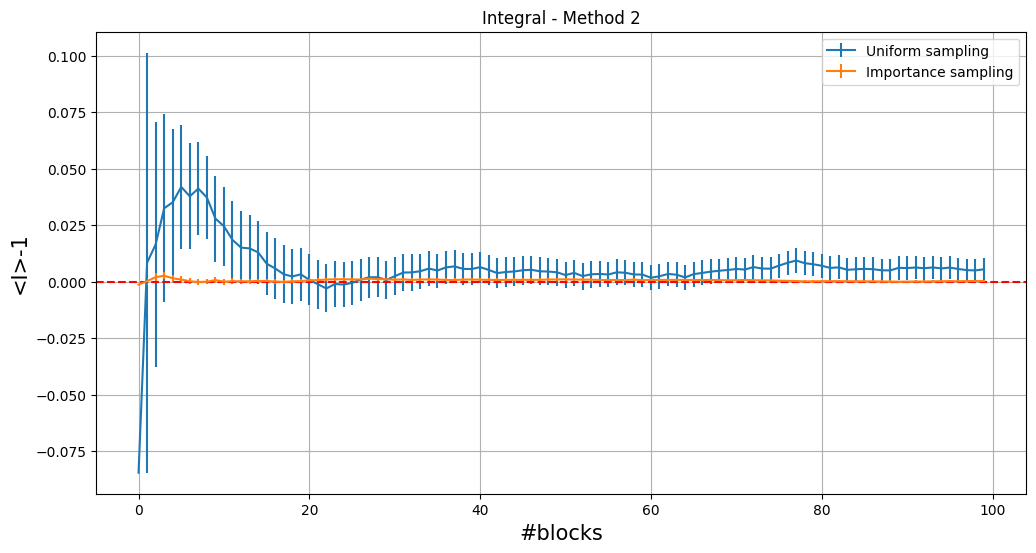

In [3]:
media_unif, varianza_unif = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_02/exercise_2_01/results_3.dat", unpack =True, usecols=(0,1))
media_notu, varianza_notu = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_02/exercise_2_01/results_4.dat", unpack =True, usecols=(0,1))

plt.figure(figsize=(12,6))
plt.errorbar(x,media_unif-I,yerr=varianza_unif, label = "Uniform sampling" )
plt.errorbar(x,media_notu-I,yerr=varianza_notu, label = "Importance sampling")
plt.axhline(y = 0., color = 'r', linestyle = '--')
plt.xlabel('#blocks', fontsize=15)
plt.ylabel('<I>-1', fontsize=15)
plt.title("Integral - Method 2")
plt.legend()
plt.grid(True)
plt.show()

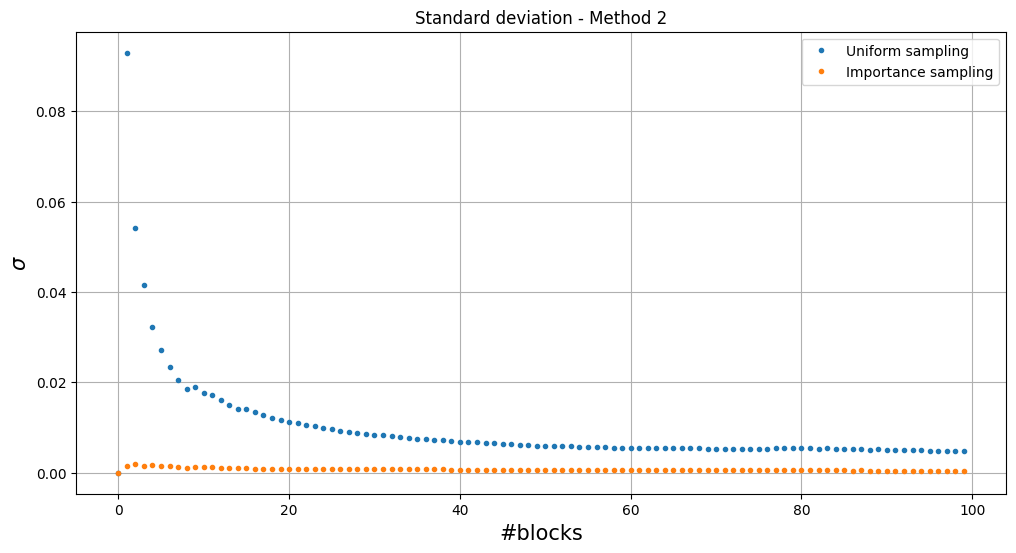

In [4]:
plt.figure(figsize=(12,6))
plt.plot(x,varianza_unif, marker = ".", linestyle = "none", label = "Uniform sampling" )
plt.plot(x,varianza_notu, marker = ".", linestyle = "none", label = "Importance sampling")
plt.xlabel('#blocks', fontsize=15)
plt.ylabel(r'$\sigma$', fontsize=15)
plt.title("Standard deviation - Method 2")
plt.legend()
plt.grid(True)
plt.show()

Observing the plots reported above it is evident that in both the methods analyzed the importance sampling performs better than the uniform sampling, as it can also be seen through its faster convergence to the expected value of the integral. 
For what concerns the two different methods investigated, it seems that method 1 produces more accurate results than method 2. This may be due to the fact that in the first method a huge number of integrals were evaluated in N points, whereas in the second method less integrals were evaluated and each integral was evaluated in N points, since M points in total were sampled from the distributions. This should explain why in the first method the estimation results more accurate. 

### Exercise 02.2
In this exercise it was asked to simulate the 3D random walk in two different scenarios: discrete on a cubic lattice and in the continuum. In both cases the random walk was made up of 100 steps of $a = 1$ length. For the discrete case, a value (namely r) was uniformly sampled from the interval $[-1, 1]$ and then, according to its sign, a counting function was designed in order to enumerate how many times a particular direction (x, y, z) was chosen. For what concerns the continuum scenario the angular variables were uniformly sampled using the following relations, in which $r \in [0,1)$:  $\theta = \cos^{-1} (1 - 2r)$, $\phi = 2 \pi r$. In order to evaluate $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ it was leveraged the blocking method. 
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

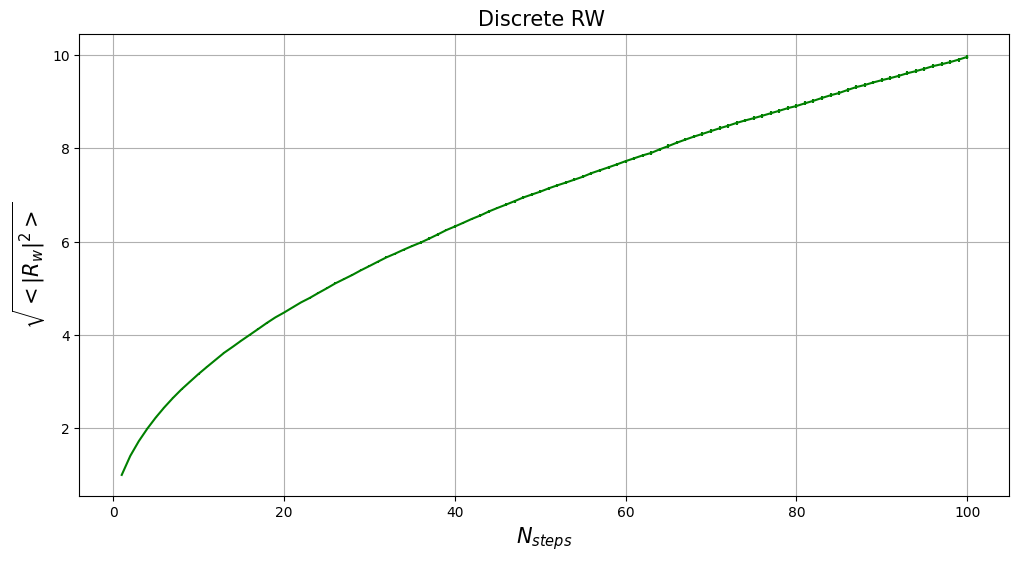

In [5]:
from scipy.optimize import curve_fit
def sqrN(x,k):
    return k*np.sqrt(x)

media, varianza = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_02/exercise_2_02/results_1.dat", unpack =True, usecols=(0,1))

M = 10000 #Number of throws
N = 100 #Number of blocks
L = (int)(M/N)#Number of throws per block
x = np.arange(1, N+1) 

plt.figure(figsize=(12,6))
plt.errorbar(x,media,yerr=varianza, color="green")
plt.xlabel('$N_{steps}$', fontsize=15)
plt.ylabel('$\sqrt{<|R_w|^2>}$', fontsize=15)
plt.title("Discrete RW ", fontsize=15)
plt.grid(True)
plt.show()

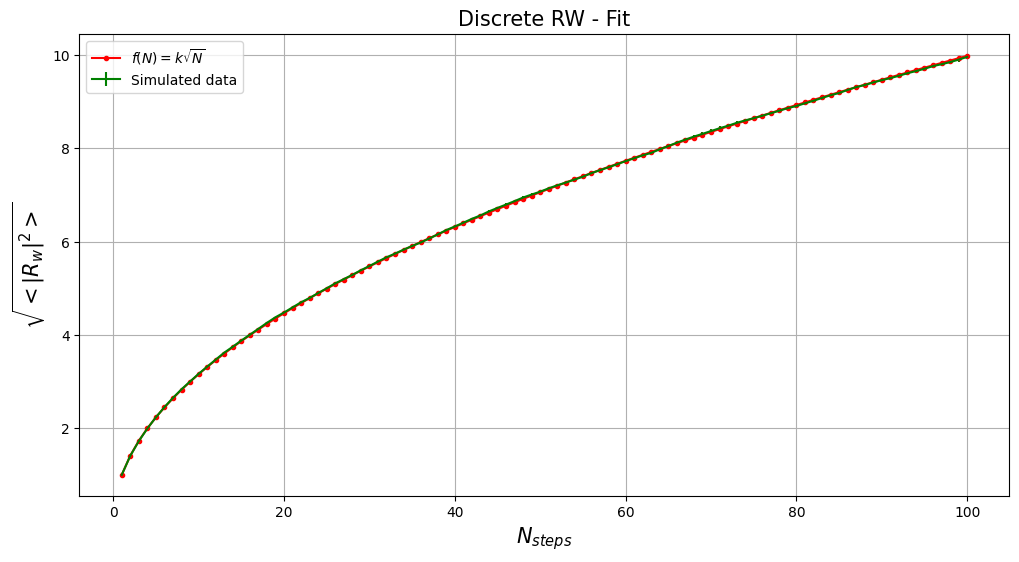

Optimized k lattice:  [0.99818239]


In [6]:
popt, pcov = curve_fit(sqrN, xdata=x, ydata=media)

plt.figure(figsize=(12,6))
plt.errorbar(x,media,yerr=varianza, color="green", label = "Simulated data")
plt.plot(x, sqrN(x,popt), label="$f(N)=k\sqrt{N}$", color="r", marker=".")
plt.xlabel('$N_{steps}$', fontsize=15)
plt.ylabel('$\sqrt{<|R_w|^2>}$', fontsize=15)
plt.title("Discrete RW - Fit", fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

print("Optimized k lattice: ", popt)

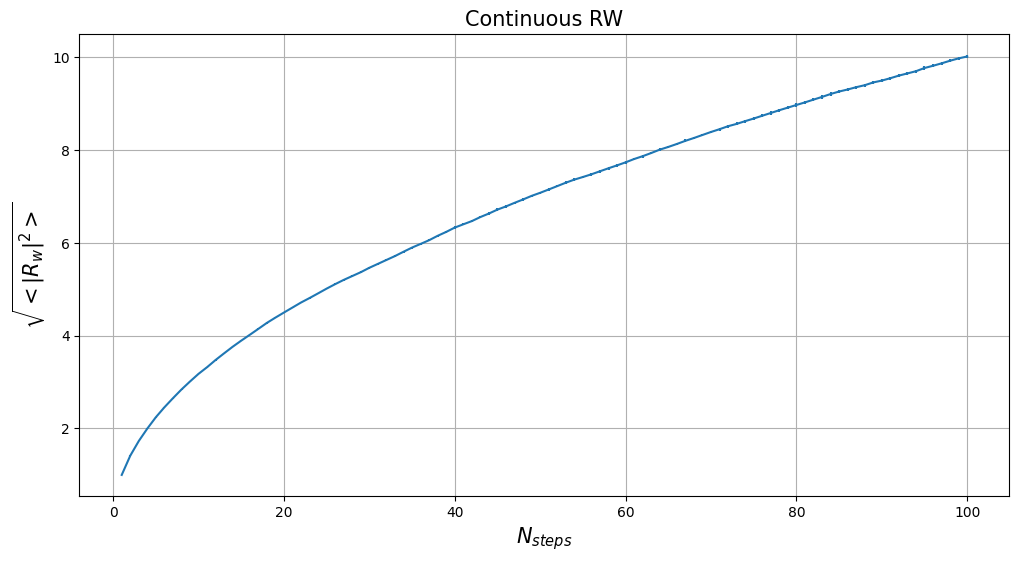

In [7]:
media, varianza = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_02/exercise_2_02/results_2.dat", unpack =True, usecols=(0,1))

plt.figure(figsize=(12,6))
plt.errorbar(x,media,yerr=varianza)
plt.xlabel('$N_{steps}$', fontsize=15)
plt.ylabel('$\sqrt{<|R_w|^2>}$', fontsize=15)
plt.title("Continuous RW", fontsize=15)
plt.grid(True)
plt.show()

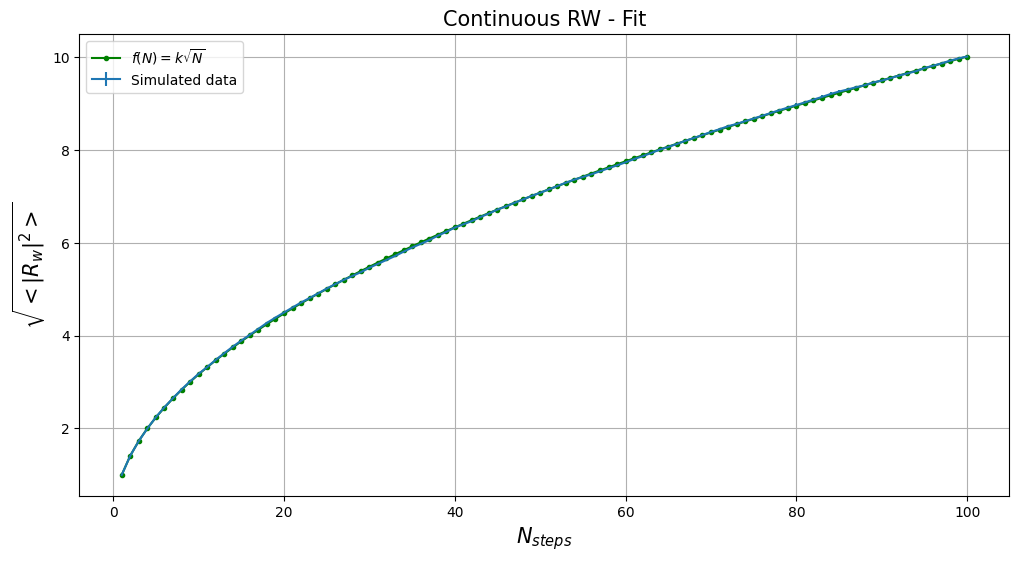

Optimized k continuum:  [1.00063018]


In [8]:
popt, pcov = curve_fit(sqrN, xdata=x, ydata=media)

plt.figure(figsize=(12,6))
plt.errorbar(x,media,yerr=varianza, label = "Simulated data")
plt.plot(x, sqrN(x,popt), label="$f(N)=k\sqrt{N}$", color="g", marker=".")
plt.xlabel('$N_{steps}$', fontsize=15)
plt.ylabel('$\sqrt{<|R_w|^2>}$', fontsize=15)
plt.title("Continuous RW - Fit", fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

print("Optimized k continuum: ", popt)

The plots above show a good agreement between the data and the characteristic diffusive law $f(N)=k\sqrt{N}$ for both the discrete and continuum scenarios. In particular, the diffusive constant k is compatible with its expected value $a^{2}$ according to the theory of diffusive models. 